In [1]:
import json
#Load in cookie
cookies = json.load(open('instagram_data_hwa_2gate.json', 'rb'))
#날짜 데이터 불러오기
dates = cookies["date"]
cookies.keys()

dict_keys(['id', 'location', 'date', 'like', 'text', 'hashtag', 'img'])

In [3]:
#년만 뽑아내기
from tqdm import tqdm
date_Y = []
for i in tqdm(range(len(dates))):
    date_Y.append(dates[i][:4])

100%|██████████████████████████████████████████████████████████████████████████| 1988/1988 [00:00<00:00, 994427.71it/s]


In [4]:
from collections import Counter

#년 카운팅
count_date_Y= Counter(date_Y)
print(count_date_Y)

Counter({'2020': 457, '2019': 410, '2017': 384, '2018': 312, '2021': 236, '2016': 142, '2015': 39, '2014': 7, '2013': 1})


In [6]:
# 연도별 좋아요 개수
# 좋아요만 뽑아와서 
likes = cookies["like"]
like = []
for i in likes:
    try:
        like.append(int(i[-3:-1]))
    except ValueError:
        like.append(0)
        
#연도별 나누기
count_like_Y = {}
count_exception = 0
count_all = 0
for i in range(2021, 2012, -1):
    count_ty = count_date_Y["{}" .format(i)] # 해당 연도 개수
    count_all = count_exception + count_ty # 이전 연도 + 해당 연도 개수
    like_Y = like[count_exception:count_all]
    count_exception = count_all # 이전 좋아요 개수
    count_like = sum(like_Y) # 연도별 좋아요 합계
    count_like_Y["{}" .format(i)] = count_like

print(sum(count_like_Y.values())) # 총 좋아요 개수
print(count_like_Y) # 연도별 좋아요 개수

66386
{'2021': 8714, '2020': 13167, '2019': 13385, '2018': 12215, '2017': 14272, '2016': 3840, '2015': 632, '2014': 153, '2013': 8}


In [18]:
#한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc

matplotlib.rcParams['font.family'] = 'SB_AGGRO_M'
print(matplotlib.rcParams['font.family'])

['SB_AGGRO_M']


dict_keys(['2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013']) dict_values([8714, 13167, 13385, 12215, 14272, 3840, 632, 153, 8])


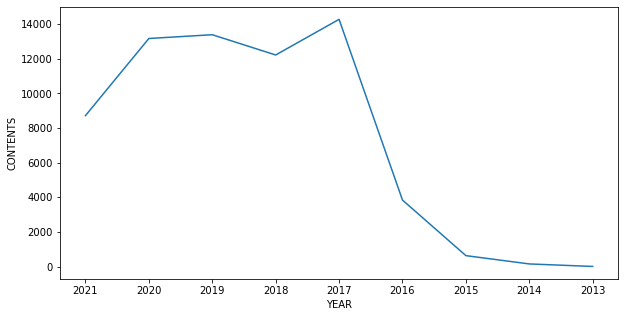

In [31]:
import matplotlib.pyplot as plt
#년 게시물 빈도수 그래프 그리기
#그래프 사이즈 지정
plt.figure(figsize=(10, 5))
#x,y축 네이밍
plt.xlabel('YEAR')
plt.ylabel('CONTENTS')

# x,y 축 범위
# plt.xlim([2013, 2021])
# plt.ylim([0, 500])

# x,y축 데이터
x_label1 = count_date_Y.keys()
y_label1 = count_date_Y.values()
plt.plot(x_label, y_label, label = "solid")



print(x_label, y_label)

plt.show()

dict_keys(['2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013']) dict_values([8714, 13167, 13385, 12215, 14272, 3840, 632, 153, 8])


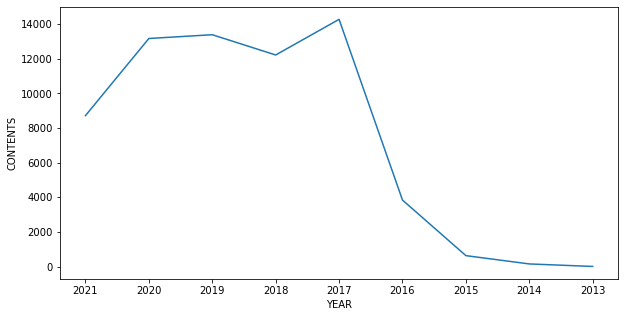

In [32]:
import matplotlib.pyplot as plt
#년 게시물 좋아요 그래프 그리기
#그래프 사이즈 지정
plt.figure(figsize=(10, 5))
#x,y축 네이밍
plt.xlabel('YEAR')
plt.ylabel('CONTENTS')

# x,y 축 범위
# plt.xlim([2013, 2021])
# plt.ylim([0, 500])

# x,y축 데이터
x_label2 = count_like_Y.keys()
y_label2 = count_like_Y.values()
plt.plot(x_label, y_label, label = "solid")



print(x_label, y_label)

plt.show()

dict_keys(['2021', '2019', '2020', '2018', '2017', '2016', '2015', '2014', '2013']) dict_values([236, 410, 457, 312, 384, 142, 39, 7, 1]) dict_values([8714, 13167, 13385, 12215, 14272, 3840, 632, 153, 8])


<ipython-input-40-d54ce95941bd>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = plt.subplot()


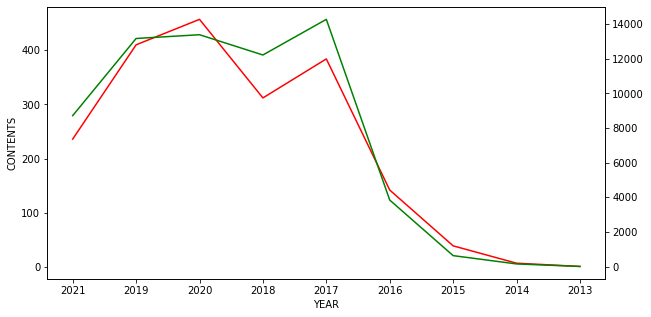

In [40]:
import matplotlib.pyplot as plt
import numpy as np
#년 게시물 좋아요 그래프 그리기
#그래프 사이즈 지정
plt.figure(figsize=(10, 5))
#x,y축 네이밍
plt.xlabel('YEAR')
plt.ylabel('CONTENTS')

# x,y축 데이터
x_label = count_date_Y.keys()
y_label1 = count_date_Y.values()
y_label2 = count_like_Y.values()

ax1 = plt.subplot()
ax1.plot(x_label, y_label1, "r-")

ax2 = ax1.twinx()
ax2.plot(x_label, y_label2, "g-")

print(x_label, y_label1, y_label2)
plt.show()